In [1]:
# For TensorFlow's Keras
import tensorflow.keras
print(tensorflow.keras.__file__)

# For standalone Keras, if you have it installed
import keras
print(keras.__file__)

# import keras.applications.vgg19 
# print(keras.applications.vgg19.__file__)

# !tensorflow --version

c:\Users\14158\miniconda3\envs\internship\Lib\site-packages\keras\_tf_keras\keras\__init__.py
c:\Users\14158\miniconda3\envs\internship\Lib\site-packages\keras\__init__.py


In [2]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import plotly.graph_objects as go
from PIL import Image
import cv2
import os

import tensorflow as tf
from keras import layers
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
print("keras: ", keras.__version__)
print("tensorflow: ", tensorflow.__version__) 

keras:  3.3.3
tensorflow:  2.16.1


In [4]:
data_path = 'C:/Users/14158/BrodyCode/HackDavis/Datasets/FinalDataset'
data_classes = os.listdir(data_path)


In [5]:
from keras.applications.vgg16 import preprocess_input

def image_preprocessing(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


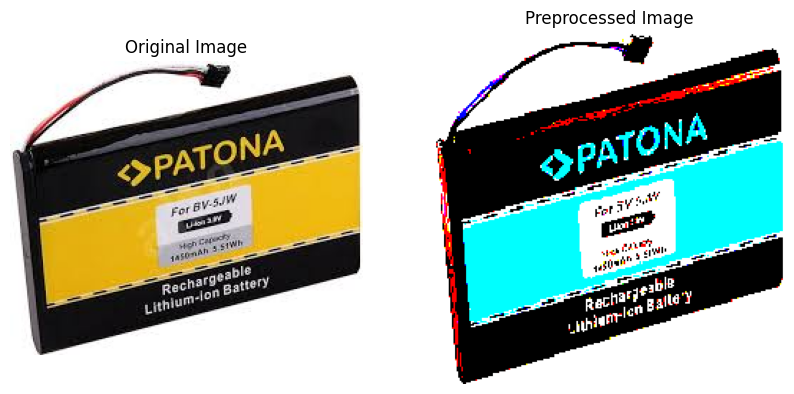

In [6]:
def plot_images(original, preprocessed):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    axs[1].imshow(np.squeeze(preprocessed, axis=0))
    axs[1].set_title('Preprocessed Image')
    axs[1].axis('off')
    plt.show()

img_path = 'C:/Users/14158/BrodyCode/HackDavis/Datasets/FinalDataset/battery/battery_18.jpg' 
original_image = Image.open(img_path)
preprocessed_image = image_preprocessing(img_path)
plot_images(original_image, preprocessed_image)

Model Architecture:

To prevent overfitting when using VGG16, the team will apply the technique of fine-tuning the pre-trained model.
Since VGG16 has up to 21 layers, we will freeze the first 2 layers (excluding the 2 layers of data layers that will not do weight training) → Then, we will fine-tune the remaining 16 layers to avoid overfit (dropout, batch-normalization,...) to improve the quality of the model.

In [7]:
# BATCH_SIZE = 64
# n_classes = 14

# # VGG16 base model
# conv_base = VGG16(
#     include_top=False,
#     weights='imagenet',
#     input_shape=(224, 224, 3)
# )







# # Import necessary libraries
# import tensorflow as tf
# from keras.models import Model
# from keras.layers import Flatten, Dense, Dropout, BatchNormalization
# from keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split

# # Assuming 'conv_base' and other necessary parts of your code are defined above this section
# # Freeze layers in the convolutional base
# for layer in conv_base.layers[:-2]:
#     layer.trainable = False

# # Adding custom layers on top of the convolutional base
# top_model = conv_base.output
# top_model = Flatten(name="flatten")(top_model)
# top_model = Dense(1024, activation='relu')(top_model)
# top_model = BatchNormalization()(top_model)
# top_model = Dropout(0.5)(top_model)
# top_model = Dense(512, activation='relu')(top_model)
# top_model = BatchNormalization()(top_model)
# top_model = Dropout(0.5)(top_model)
# output_layer = Dense(n_classes, activation='softmax')(top_model)

# # Final Model
# model = Model(inputs=conv_base.input, outputs=output_layer)

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Data generators
# gen_train = ImageDataGenerator(preprocessing_function=preprocess_input) 
# train_data = gen_train.flow_from_directory(data_path, target_size=(224, 224), batch_size=BATCH_SIZE, class_mode="categorical", shuffle=True)

# # Set up callbacks
# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=3, verbose=1),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2),
#     ModelCheckpoint('model_best.keras', monitor='val_loss', save_best_only=True)
# ]




# # Training the model
# history = model.fit(
#     train_data,
#     steps_per_epoch=len(train_data),
#     epochs=20,  # Adjust epochs according to your needs
#     callbacks=callbacks
# )

# # Save the trained model
# model.save('FINAL_VGG16.keras')

In [8]:
#If YOU DONT WANT TO RUN MODEL 
BATCH_SIZE = 64
n_classes = 6

# VGG16 base model
conv_base = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
# Adding custom layers on top of the convolutional base
top_model = conv_base.output
top_model = Flatten(name="flatten")(top_model)
top_model = Dense(1024, activation='relu')(top_model)
top_model = BatchNormalization()(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(512, activation='relu')(top_model)
top_model = BatchNormalization()(top_model)
top_model = Dropout(0.5)(top_model)
output_layer = Dense(n_classes, activation='softmax')(top_model)

# Final Model
model = Model(inputs=conv_base.input, outputs=output_layer)
vgg16 = load_model("C:/Users/14158/BrodyCode/HackDavis/Notebooks/FINAL_VGG16.keras")
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 40,939,846 (156.17 MB)

 Trainable params: 40,936,774 (156.16 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [10]:
# # Final Model

# # visualkeras.layered_view(model, to_file='model_architecture.png', legend=True)
# # model = Model(inputs=conv_base.input, outputs=output_layer)


vgg16 = load_model("C:/Users/16332/Desktop/Spring 2024/HackDavis/Notebooks/FINAL_VGG16.keras")
model.summary()
# 

Splitting the dataset to 10% test 90% trainging

In [11]:
gen_train = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing
full_data = gen_train.flow_from_directory(data_path, target_size = (224, 224), batch_size = BATCH_SIZE, class_mode="categorical")

Found 25161 images belonging to 14 classes.


In [12]:
filenames = full_data.filenames
labels = full_data.labels
class_mapping = {value: str(key) for key, value in full_data.class_indices.items()}
labels = [class_mapping[label] for label in labels]

# Split the data into training and testing sets
train_filenames, test_filenames, train_labels, test_labels = train_test_split(filenames, labels, test_size=0.1, random_state=42)

train_df = pd.DataFrame({'filename': train_filenames, 'class': train_labels})
test_df = pd.DataFrame({'filename': test_filenames, 'class': test_labels})

# Create separate generators for training and testing using flow_from_dataframe
train_data = gen_train.flow_from_dataframe(train_df, directory=data_path, target_size=(224, 224),
                                           batch_size=BATCH_SIZE, class_mode="categorical",
                                           shuffle=True, seed=42)

test_data = gen_train.flow_from_dataframe(test_df, directory=data_path, target_size=(224, 224),
                                          batch_size=BATCH_SIZE, class_mode="categorical",
                                          shuffle=False)

Found 22644 validated image filenames belonging to 14 classes.
Found 2517 validated image filenames belonging to 14 classes.


# VGG16
***

In [20]:
"TRAIN THE MODEL EXTRA EPOCHS"

# def train_vgg16(epochs): 
#     # Compile the model
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#     # Data generators
#     gen_train = ImageDataGenerator(preprocessing_function=preprocess_input) 
#     train_data = gen_train.flow_from_directory(data_path, target_size=(224, 224), batch_size=BATCH_SIZE, class_mode="categorical", shuffle=True)

#     # Set up callbacks
#     callbacks = [
#         EarlyStopping(monitor='val_loss', patience=3, verbose=1),
#         ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2),
#         ModelCheckpoint('model_best.keras', monitor='val_loss', save_best_only=True)
#     ]

#     # Training the model
#     history = model.fit(
#         train_data,
#         steps_per_epoch=len(train_data),
#         epochs=epochs,  # Adjust epochs according to your needs
#         callbacks=callbacks
#     )

#     # Save the trained model
#     model.save('VGG16.keras')

# train_vgg16(4)

'TRAIN THE MODEL EXTRA EPOCHS'

In [13]:
vgg16 = load_model("C:/Users/14158/BrodyCode/HackDavis/Notebooks/FINAL_VGG16.keras")


output_class = ["battery", "biological", "cardboard", "cement", " clothes", "electronics", "glass", "leather", "metal","paper", "plastic", "rubber", "trash", "wood"]

def preprocessing_input(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img) # VGG16 preprocess_input
    return img

def plot_images(original, preprocessed):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(original)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    # Remove the batch dimension for display
    preprocessed = np.squeeze(preprocessed, axis=0)

    axs[1].imshow(preprocessed)
    axs[1].set_title('Preprocessed Image')
    axs[1].axis('off')

    plt.show()

def predict_user(img_path):
    img = preprocessing_input(img_path)
    plot_images(Image.open(img_path), img)
    predicted_array = model.predict(img)
    predicted_value = output_class[np.argmax(predicted_array)]
    predicted_accuracy = round(np.max(predicted_array) * 100, 2)
    print("Your waste material is", predicted_value, "with", predicted_accuracy, "% accuracy.")

40/40 ━━━━━━━━━━━━━━━━━━━━ 230s 6s/step


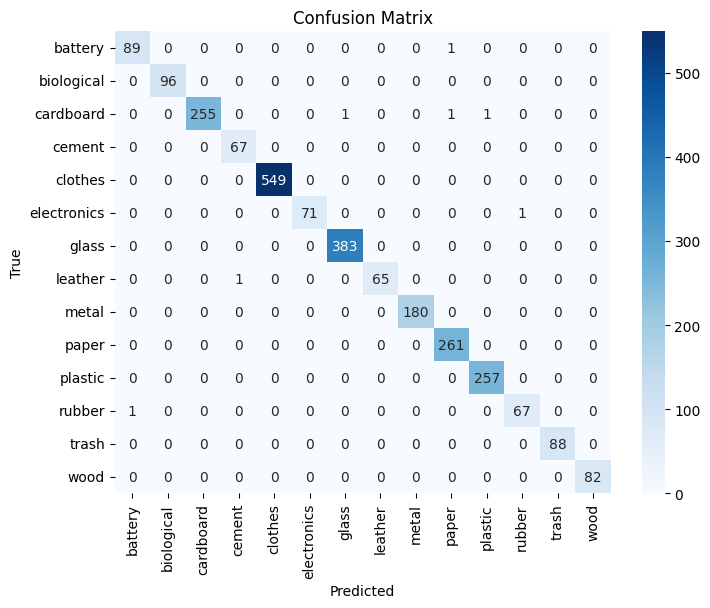

              precision    recall  f1-score   support

     battery       0.99      0.99      0.99        90
  biological       1.00      1.00      1.00        96
   cardboard       1.00      0.99      0.99       258
      cement       0.99      1.00      0.99        67
     clothes       1.00      1.00      1.00       549
 electronics       1.00      0.99      0.99        72
       glass       1.00      1.00      1.00       383
     leather       1.00      0.98      0.99        66
       metal       1.00      1.00      1.00       180
       paper       0.99      1.00      1.00       261
     plastic       1.00      1.00      1.00       257
      rubber       0.99      0.99      0.99        68
       trash       1.00      1.00      1.00        88
        wood       1.00      1.00      1.00        82

    accuracy                           1.00      2517
   macro avg       1.00      1.00      1.00      2517
weighted avg       1.00      1.00      1.00      2517



In [14]:
vgg16 = load_model("C:/Users/14158/BrodyCode/HackDavis/Notebooks/FINAL_VGG16.keras")
predictions = vgg16.predict(test_data)

# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true class labels
true_labels = test_data.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
class_names = list(test_data.class_indices.keys())
print(classification_report(true_labels, predicted_labels, target_names=class_names))


# model.save('VGG16.keras')

In [16]:
# Mean Square Error
from sklearn.metrics import mean_squared_error

# Assuming 'predictions' are probabilities and 'true_labels' are one-hot encoded for multi-class
mse = mean_squared_error(np.eye(len(class_names))[true_labels], predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.00037428179206838843


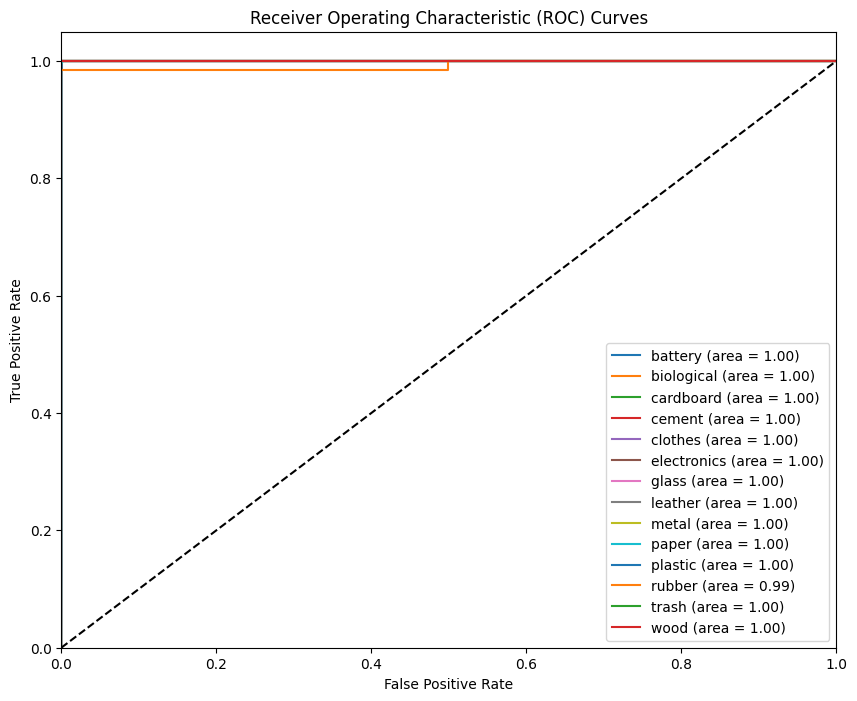

In [17]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for one-vs-all ROC computation
y_bin = label_binarize(true_labels, classes=np.arange(len(class_names)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

#TODO: MAKE A SUBPLOT THAT's more zoomed in we dont have to see the curve? 

In [ ]:

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

# Plot training accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

# Extract only odd epochs (1st, 3rd, 5th, etc.)
odd_epochs = [epoch for epoch in epochs if epoch % 2 != 0]
odd_acc = [acc[i-1] for i in odd_epochs]  # adjust index since epochs starts from 1 but list indexing starts from 0
odd_loss = [loss[i-1] for i in odd_epochs]

# Plot training accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(odd_epochs, odd_acc, 'bo-', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(odd_epochs, odd_loss, 'ro-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


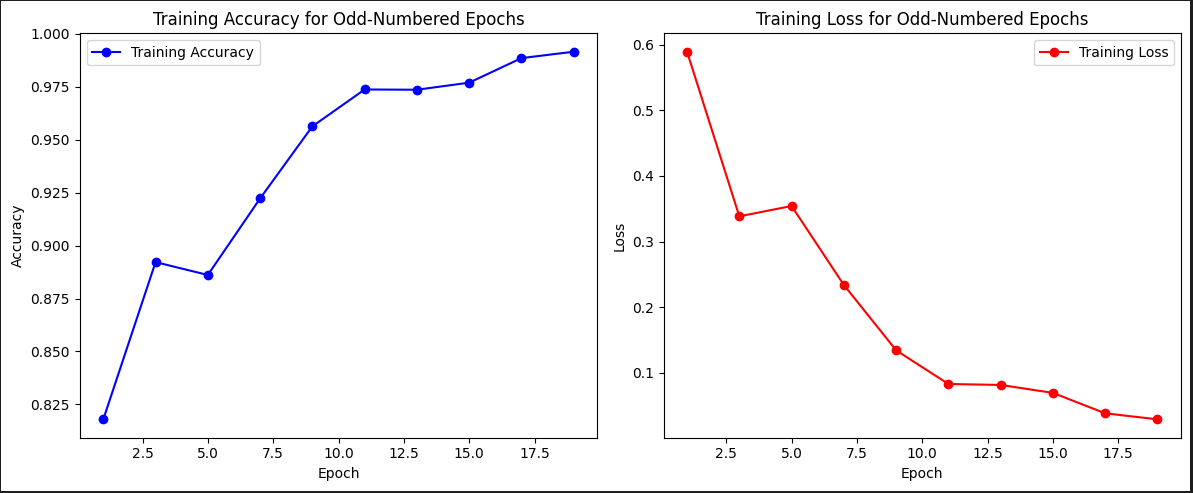

# TEST EXAMPLES: 
***

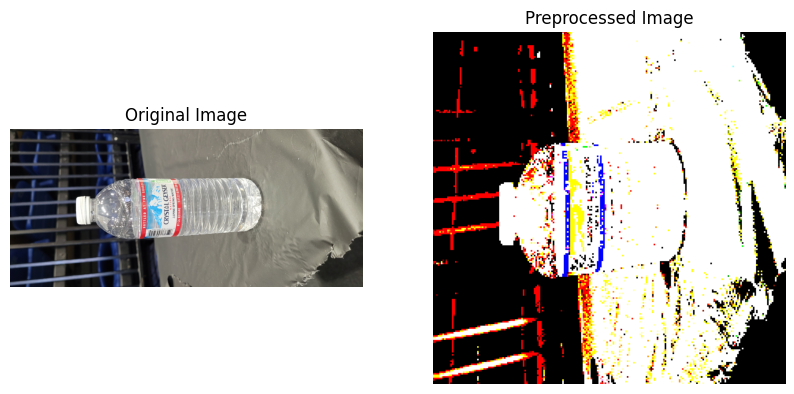

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
pred acc ROUND:  89.85
20240428_104949.jpg: Your waste material is plastic with 89.85% accuracy.
Your waste material is plastic. Therefore, you should recycle it if it's recyclable or dispose of it properly.


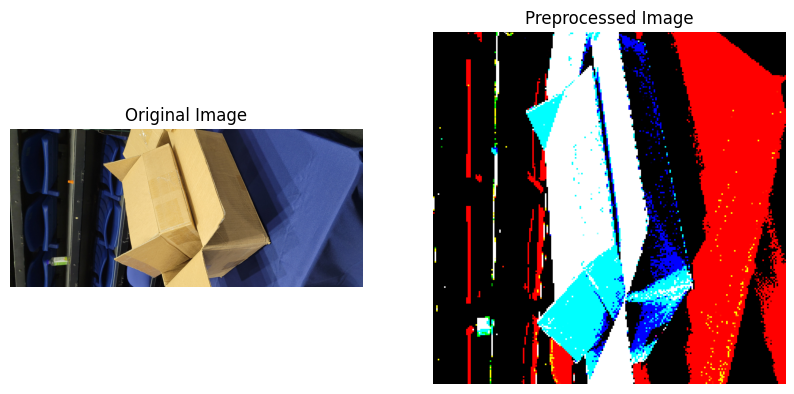

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
pred acc ROUND:  99.97
20240428_105000.jpg: Your waste material is paper with 99.97% accuracy.
Your waste material is paper. Therefore, you should recycle it.


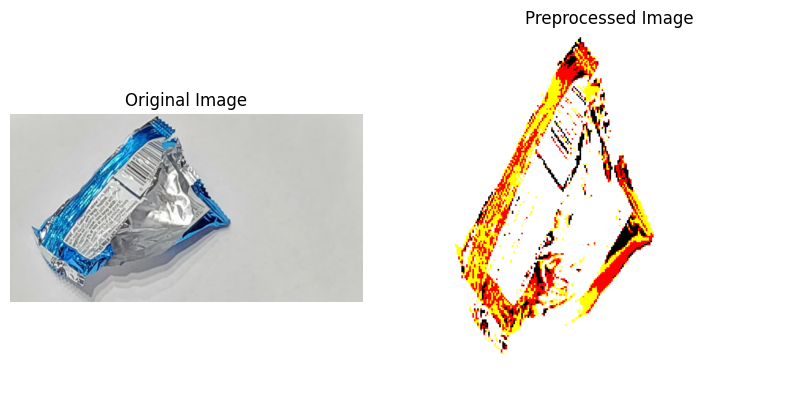

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
pred acc ROUND:  99.37
20240428_111548.jpg: Your waste material is plastic with 99.37% accuracy.
Your waste material is plastic. Therefore, you should recycle it if it's recyclable or dispose of it properly.


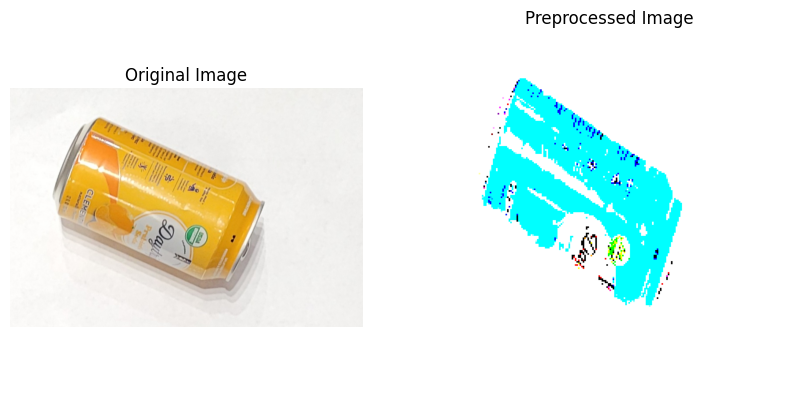

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
pred acc ROUND:  52.0
20240428_111739.jpg: Your waste material is metal with 52.0% accuracy.
Your waste material is metal. Therefore, you should recycle it.


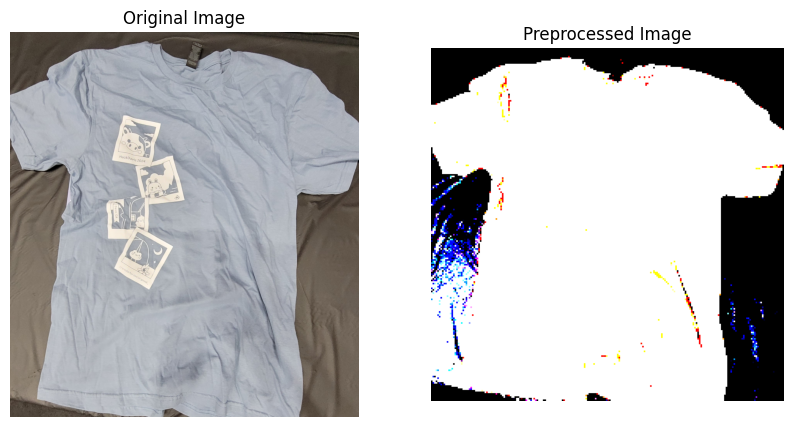

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
pred acc ROUND:  100.0
20240428_114827.jpg: Your waste material is  clothes with 100.0% accuracy.


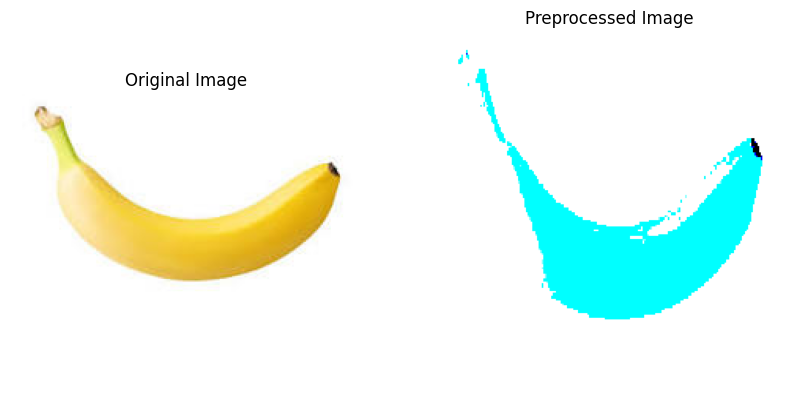

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
pred acc ROUND:  99.63
download.jpg: Your waste material is biological with 99.63% accuracy.
Your waste material is biological. Therefore, you should compost it.


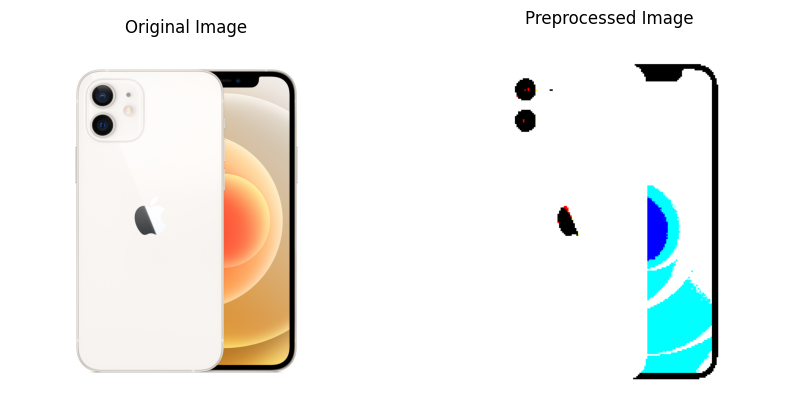

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
pred acc ROUND:  41.53
refurb-iphone-12-white-2020.jpg: Your waste material is plastic with 41.53% accuracy.
We are not certain of the image you've provided. Please take another photo.


In [31]:
import numpy as np
import os
from keras.preprocessing import image
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Load the model
vgg16 = load_model("C:/Users/14158/BrodyCode/HackDavis/Notebooks/FINAL_VGG16.keras")

# Update the preprocess_input import
from keras.applications.vgg16 import preprocess_input

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def plot_images(original, preprocessed):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    # Convert preprocessed image back to a displayable format
    preprocessed_display = np.clip(preprocessed[0] * 0.5 + 0.5, 0, 1)
    axs[1].imshow(preprocessed_display)
    axs[1].set_title('Preprocessed Image')
    axs[1].axis('off')
    plt.show()

def predict_folder(folder_path):
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            original_image = Image.open(img_path)
            preprocessed_image = load_and_preprocess_image(img_path)
            plot_images(original_image, preprocessed_image)
            predicted_array = vgg16.predict(preprocessed_image)
            
            predicted_value = output_class[np.argmax(predicted_array)]
            
            predicted_accuracy = round(np.max(predicted_array) * 100, 2)
            print("pred acc ROUND: ", round(np.max(predicted_array) * 100, 2))
            print(f"{img_file}: Your waste material is {predicted_value} with {predicted_accuracy}% accuracy.")
            
            if round(np.max(predicted_array) * 100, 2) > 50: 

                if predicted_value in ["battery", "electronics"]:
                    print(f"Your waste material is {predicted_value}. Therefore, you should dispose of it at an e-waste facility.")
                elif predicted_value == "biological":
                    print(f"Your waste material is {predicted_value}. Therefore, you should compost it.")
                elif predicted_value == "cardboard":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it.")
                elif predicted_value == "cement":
                    print(f"Your waste material is {predicted_value}. Therefore, it should be disposed of in construction waste.")
                elif predicted_value == "clothes":
                    print(f"Your waste material is {predicted_value}. Therefore, you should donate it or dispose of it in a textile recycling bin.")
                elif predicted_value == "glass":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it.")
                elif predicted_value == "leather":
                    print(f"Your waste material is {predicted_value}. Consider donating it or using a special waste disposal service.")
                elif predicted_value == "metal":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it.")
                elif predicted_value == "paper":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it.")
                elif predicted_value == "plastic":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it if it's recyclable or dispose of it properly.")
                elif predicted_value == "rubber":
                    print(f"Your waste material is {predicted_value}. Consider taking it to a special recycling or disposal facility.")
                elif predicted_value == "trash":
                    print(f"Your waste material is {predicted_value}. Unfortunately, this should go to the landfill.")
                elif predicted_value == "wood":
                    print(f"Your waste material is {predicted_value}. It can often be recycled or repurposed, depending on the condition.")

            else: 
                print("We are not certain of the image you've provided. Please take another photo.")
                
                
                

# Example usage
folder_path = 'C:/Users/14158/BrodyCode/HackDavis/Datasets/AndroidDataset'
predict_folder(folder_path)


c:\Users\16332\.conda\envs\HackDavis\Lib\site-packages\keras\_tf_keras\keras\__init__.py
c:\Users\16332\.conda\envs\HackDavis\Lib\site-packages\keras\__init__.py


keras:  3.3.3
tensorflow:  2.16.1
